# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell),
04. No comments in the code; anything worth mentioning should be included in the documentation,
05. Use descriptive variable names,
06. Functions should do only one thing,
07. Check submission deadline on Gradescope, 
08. Rename the file to Last_First_assignment_4, 
09. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
10. Do not submit any other files.

## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Keep functions to 20 lines or less (including empty lines so do not add any),
* Each helper function should be followed by three assert-style unit tests.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
import unittest

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


## Node

The `Node` class represents a node in a graph, containing information about its identifier, name, neighbors, valid color options, and the color currently assigned to it. It also tracks invalid colors that cannot be assigned due to conflicts with neighboring nodes.

### Parameters:
* **number** `int`: A unique identifier for the node.
* **name** `str`: The name or label for the node.
* **neighbors** `List[int]`: A list of integers representing the neighboring node numbers connected to this node.
* **valid_colors** `List[str]`: A list of valid color options that can be assigned to this node.

### Attributes:
* **__number** `int`: The unique identifier for the node, used to differentiate between nodes.
* **__name** `str`: The name or label for the node.
* **__neighbors** `List[int]`: A list of neighboring node numbers.
* **__valid_colors** `List[str]`: A list of colors that can still be assigned to this node.
* **__invalid_colors** `List[Tuple[str, Node]]`: A list of invalidated colors, where each invalid color is paired with the node that invalidated it.
* **__color** `str or None`: The color currently assigned to the node, if any. Initially `None` until a color is assigned.

### Methods:

---

<a id="node_constructor"></a>
### `__init__(number, name, neighbors, valid_colors)`

Initializes the node with the given number, name, neighbors, and valid color options. The node starts with no assigned color, and an empty list of invalid colors.

* **number** `int`: The unique identifier for the node.
* **name** `str`: The name or label for the node.
* **neighbors** `List[int]`: A list of neighboring node numbers.
* **valid_colors** `List[str]`: A list of valid color options for the node.

**returns** None.

---

<a id="get_number"></a>
### `get_number()`

Returns the unique identifier of the node.

**returns** `int`: The number assigned to the node.

---

<a id="get_name"></a>
### `get_name()`

Returns the name of the node.

**returns** `str`: The name or label of the node.

---

<a id="get_neighbors"></a>
### `get_neighbors()`

Returns the list of neighboring nodes connected to this node.

**returns** `List[int]`: A list of neighboring node numbers.

---

<a id="get_valid_colors"></a>
### `get_valid_colors()`

Returns the list of valid color options that can still be assigned to the node.

**returns** `List[str]`: A list of valid color options for the node.

---

<a id="get_color"></a>
### `get_color()`

Returns the current color assigned to the node.

**returns** `str or None`: The color assigned to the node, or `None` if no color has been assigned yet.

---

<a id="set_color"></a>
### `set_color(color)`

Sets the color of the node to the specified value.

* **color** `str`: The color to assign to the node.

**returns** None.

---

<a id="invalidate_color"></a>
### `invalidate_color(color, invalidator)`

Invalidates the specified color for the node by removing it from the list of valid colors. The color is added to the list of invalidated colors along with the node (invalidator) that caused the conflict.

* **color** `str`: The color to invalidate for this node.
* **invalidator** `Node`: The node that caused the color to be invalidated.

**returns** None.

---

<a id="str"></a>
### `__str__()`

Returns a string representation of the node, including its number, name, neighbors, valid colors, invalid colors, and current color.

**returns** `str`: A formatted string displaying the node's attributes.

Example output:


In [3]:
class Node:
    def __init__(self, number, name, neighbors, valid_colors):
        self.__number = number
        self.__name = name
        self.__neighbors = neighbors
        self.__valid_colors = valid_colors
        self.__invalid_colors = []
        self.__color = None
        
    def get_number(self):
        return self.__number
    
    def get_name(self):
        return self.__name
    
    def get_neighbors(self):
        return self.__neighbors
    
    def get_valid_colors(self):
        return self.__valid_colors
    
    def get_color(self):
        return self.__color
    
    def set_color(self, color):
        self.__color = color
        
    def invalidate_color(self, color, invalidator):
        if color in self.__valid_colors:
            self.__valid_colors.remove(color)
        if not color in self.__invalid_colors:
            self.__invalid_colors.append((color, invalidator))
        
    def __str__(self):
        return f'[{self.__number}, {self.__name}, {self.__neighbors}, {self.__valid_colors}, {self.__invalid_colors}, {self.__color}]'

## Graph

The `Graph` class represents a graph structure designed for solving node coloring problems using various heuristics and a backtracking algorithm. Nodes are initialized with valid color options, and several heuristics are implemented to optimize the coloring process.

### Parameters:
* **graph** `Dict`: A dictionary containing:
  - `"nodes"`: A list of node names or labels.
  - `"edges"`: A list of tuples representing edges between nodes. Each tuple contains two integers representing the indices of the connected nodes.
  - `"coordinates"`: A list of tuples representing the coordinates of each node.
* **color_options** `List[str]`: A list of valid colors that can be assigned to each node.
* **trace** `bool` (optional): If `True`, prints debug and trace information at each step of the initialization or heuristics. Defaults to `False`.

### Attributes:
* **__color_options** `List[str]`: A list of valid colors that can be assigned to each node in the graph.
* **__nodes** `List[Node]`: A list of `Node` objects representing the nodes in the graph, each initialized with its neighbors and valid color options.

### Methods:

---

<a id="graph_constructor"></a>
### `__init__(graph, color_options, trace=False)`

Initializes the graph by creating nodes and establishing the connections between them. Each node is initialized with its list of neighbors and available color options. If `trace` is enabled, the graph and its nodes are printed.

* **graph** `Dict`: A dictionary containing nodes, edges, and coordinates.
* **color_options** `List[str]`: The list of valid color options for each node.
* **trace** `bool` (optional): If `True`, prints trace information during the node initialization process.

**returns** None.

---

<a id="get_nodes"></a>
### `get_nodes()`

Returns the list of nodes in the graph.

**returns** `List[Node]`: A list of `Node` objects representing the nodes in the graph.

---

<a id="degree_heuristic"></a>
### `degree_heuristic(trace=False)`

Sorts the nodes by degree in decreasing order (i.e., nodes with more neighbors appear first). This heuristic is useful for deciding the order in which to color the nodes, as nodes with more constraints (higher degree) are colored earlier.

* **trace** `bool` (optional): If `True`, prints trace information during sorting.

**returns** `List[Node]`: A list of `Node` objects sorted by their degree (highest degree first).

---

<a id="minimum_remaining_values_heuristic"></a>
### `minimum_remaining_values_heuristic(trace=False)`

Applies the Minimum Remaining Values (MRV) heuristic to select nodes with the fewest valid colors left. It prioritizes the most constrained nodes (those with the least remaining color options).

* **trace** `bool` (optional): If `True`, prints trace information during the sorting process.

**returns** `List[Tuple[int, int]]`: A list of tuples where each tuple contains the node number and the number of remaining valid colors, sorted by the number of valid colors in ascending order.

---

<a id="least_constrained_values_heuristic"></a>
### `least_constrained_values_heuristic(node, trace=False)`

Finds the least constrained values (colors) for a given node. The function counts how many neighboring nodes share each valid color, and sorts the colors by how constrained they are.

* **node** `Node`: The node for which to find the least constrained values.
* **trace** `bool` (optional): If `True`, prints trace information during the process.

**returns** `List[Tuple[str, int]]`: A list of tuples where each tuple contains a color and the number of neighboring nodes that share that color, sorted by the least constrained color first.

---

<a id="forward_checking"></a>
### `forward_checking(curr_node, color, trace=False)`

Performs forward checking by invalidating a given color for the neighbors of the current node. This prevents conflicts by ensuring that no two adjacent nodes share the same color.

* **curr_node** `Node`: The current node that is being colored.
* **color** `str`: The color assigned to the current node.
* **trace** `bool` (optional): If `True`, prints trace information during forward checking.

**returns** None.

---

<a id="backtrack"></a>
### `backtrack(ordered_nodes, depth, total_nodes, trace=False)`

Recursively applies the backtracking algorithm to assign colors to nodes in the graph. The function explores all possible color assignments for each node, backtracking if conflicts are detected. It uses the least constrained values heuristic to minimize conflicts and forward checking to prune invalid color assignments.

* **ordered_nodes** `List[Node]`: A list of nodes in the order they should be colored.
* **depth** `int`: The current depth of recursion, representing how many nodes have been processed.
* **total_nodes** `int`: The total number of nodes that need to be colored.
* **trace** `bool` (optional): If `True`, prints trace information at each step of the backtracking process.

**returns** `Graph or None`: If a valid coloring is found, the graph with the colored nodes is returned. If no valid coloring is possible, `None` is returned, indicating failure.

---

<a id="bonus_backtrack"></a>
### `bonus_backtrack(ordered_nodes, depth, total_nodes, trace=False)`

A variation of the `backtrack()` function that dynamically adjusts the order of nodes to be colored using the Minimum Remaining Values (MRV) heuristic during each recursive step.

* **ordered_nodes** `List[Tuple[int, int]]`: A list of tuples where each tuple contains the node number and the number of remaining valid colors, sorted by the number of valid colors in ascending order.
* **depth** `int`: The current depth of recursion, representing how many nodes have been processed.
* **total_nodes** `int`: The total number of nodes that need to be colored.
* **trace** `bool` (optional): If `True`, prints trace information at each step of the backtracking process.

**returns** `Graph or None`: If a valid coloring is found, the graph with the colored nodes is returned. If no valid coloring is possible, `None` is returned.

---

<a id="str"></a>
### `__str__()`

Returns a string representation of the graph, listing all nodes and their attributes.

**returns** `str`: A formatted string displaying the nodes and their details.

Example output:


In [4]:
class Graph:
    
    def __init__(self, graph, color_options, trace=False):
        self.__color_options = color_options
        self.__nodes = self.__initialize_nodes(graph, trace)
        if trace: print(self)
        
    def __initialize_nodes(self, graph, trace=False):
        if trace: print("Initializing Graph Nodes for Graph with all specified color options")
        nodes = []
        for i in range(len(graph["nodes"])):
            neighbors = []
            for edge in graph["edges"]:
                if edge[0] == i and not edge[1] == i:
                    neighbors.append(edge[1])
                elif edge[1] == i and not edge[0] == i:
                    neighbors.append(edge[0])
            nodes.append(Node(i, graph["nodes"][i], neighbors, deepcopy(self.__color_options)))
        return nodes
    
    def get_nodes(self):
        return self.__nodes
    
    def degree_heuristic(self, trace=False):
        if trace:
            print("Sorting nodes by decreasing order of degree for Degree Heuristic")
        return sorted(self.__nodes, key=lambda node: -len(node.get_neighbors()))
    
    def minimum_remaining_values_heuristic(self, trace=False):
        if trace: print("Sorting nodes by decreasing order of constraints for Minimum Remaining Values Heuristic")
        constraint_list = {}
        for node in self.__nodes:
            if node.get_color() == None:
                constraint_list[node.get_number()] = len(node.get_valid_colors())
        if len(constraint_list) > 0:
            return sorted(constraint_list.items(), key=lambda item: item[1])
        return []              
    
    def least_constrained_values_heuristic(self, node, trace=False):
        if trace: print("Finding least constrained values of node")
        shared_list = {}
        for color in node.get_valid_colors():
            shared_list[color] = 0
            for neighbor_number in node.get_neighbors():
                if color in self.__nodes[neighbor_number].get_valid_colors():
                    shared_list[color] = shared_list[color] + 1
        if len(shared_list) > 0:
            return sorted(shared_list.items(), key=lambda item: item[1])  
        return []
    
    def forward_checking(self, curr_node, color, trace=False):
        if trace: print('Forward checking by invalidating neighbor\'s color')
        for neighbor_number in curr_node.get_neighbors():
            if trace: print('Invalidating neighbor', neighbor_number, 'color', color)
            neighbor = self.__nodes[neighbor_number]
            neighbor.invalidate_color(color, curr_node)
            
    def backtrack(self, ordered_nodes, depth, total_nodes, trace=False):
        if trace: print('Finding color of node at graph depth', depth)
        if depth >= total_nodes:
            if trace: print('Base case satisfied!')
            return self
        if trace: print('Making deepcopy of graph at depth', depth)
        saved_graph = deepcopy(self)
        if trace: print('Getting node for current graph depth')
        curr_node = saved_graph.__nodes[ordered_nodes[depth].get_number()]
        for color, num_shared in saved_graph.least_constrained_values_heuristic(curr_node, trace):
            if trace: print('Trying to find solution with color', color, 'for node', curr_node, 'at depth', depth)
            curr_node.set_color(color)
            saved_graph.forward_checking(curr_node, color, trace)
            result = deepcopy(saved_graph).backtrack(deepcopy(ordered_nodes), depth + 1, total_nodes)
            if not result == None:
                if trace: print('Successful search for color', color, 'for node', curr_node, 'at depth', depth)
                return result
            if trace: print('Unsuccessful search. Restoring graph to original at depth', depth)
            saved_graph = deepcopy(self)
            curr_node = saved_graph.__nodes[ordered_nodes[depth].get_number()]
        if trace: print('No more configurations remain to be tested')
        return None
    
    def bonus_backtrack(self, ordered_nodes, depth, total_nodes, trace=False):
        if trace: print('Finding color of node at graph depth', depth)
        if depth >= total_nodes:
            if trace: print('Base case satisfied!')
            return self
        if trace: print('Making deepcopy of graph at depth', depth)
        saved_graph = deepcopy(self)
        if trace: print('Getting node for current graph depth')
        if len(ordered_nodes) > 0:
            curr_node = saved_graph.__nodes[ordered_nodes[0][0]]
            for color, num_shared in saved_graph.least_constrained_values_heuristic(curr_node, trace):
                if trace: print('Trying to find solution with color', color, 'for node', curr_node, 'at depth', depth)
                curr_node.set_color(color)
                saved_graph.forward_checking(curr_node, color, trace)
                result = deepcopy(saved_graph).bonus_backtrack(deepcopy(saved_graph.minimum_remaining_values_heuristic(trace)), depth + 1, total_nodes)
                if not result == None:
                    if trace: print('Successful search for color', color, 'for node', curr_node, 'at depth', depth)
                    return result
                if trace: print('Unsuccessful search. Restoring graph to original at depth', depth)
                saved_graph = deepcopy(self)
                if len(ordered_nodes) > 0:
                    curr_node = saved_graph.__nodes[ordered_nodes[0][0]]
                else:
                    break
        if trace: print('No more configurations remain to be tested')
        return None
    
    def __str__(self):
        string = "Nodes:\n"
        for node in self.__nodes:
            string = string + node.__str__() + '\n'
        return string     

## TestGraphMethods

The `TestGraphMethods` class contains unit tests for the `Graph` class methods, including `degree_heuristic`, `least_constrained_values_heuristic`, and `forward_checking`. This class uses Python's `unittest` framework to validate the correctness of the graph coloring methods.

### Methods:

---

<a id="setUp"></a>
### `setUp()`

Sets up the test environment for each test case by creating a sample graph with nodes, edges, coordinates, and a set of valid color options. This graph is used in all the test methods.

**returns** None.

---

<a id="test_degree_heuristic"></a>
### `test_degree_heuristic()`

Tests the `degree_heuristic()` method of the `Graph` class. The method should correctly sort the nodes by degree (i.e., the number of neighbors) in decreasing order.

* **checks**: 
    - The method sorts nodes such that nodes with the most neighbors appear first.
    - Verifies that the order of nodes is as expected based on the sample graph.

**returns** None.

---

<a id="minimum_remaining_values_heuristic"></a>
### `minimum_remaining_values_heuristic(trace=False)`

This method implements the Minimum Remaining Values (MRV) heuristic for selecting the next node to be colored in the graph coloring problem. It selects the node that has the fewest valid color options left, prioritizing nodes that are more constrained.

### Parameters:
* **trace** `bool` (optional): If `True`, prints trace information during execution, showing the sorting process and the constraints for each node. Defaults to `False`.

### Returns:
* **List[Tuple[str, int]]**: A list of tuples where each tuple contains the name of a node and the number of remaining valid colors for that node. The list is sorted in ascending order, with the most constrained nodes (i.e., those with the fewest valid colors) appearing first.

### Example:
```python
graph = Graph(graph_data, color_options)
result = graph.minimum_remaining_values_heuristic(trace=True)

---

<a id="test_least_constrained_values_heuristic"></a>
### `test_least_constrained_values_heuristic()`

Tests the `least_constrained_values_heuristic(node, trace)` method of the `Graph` class. This method determines the least constrained color for a node by checking how many neighbors share each color.

* **checks**: 
    - The method correctly identifies and orders colors by how constrained they are.
    - Initially, all colors are equally constrained for a node.
    - After invalidating a color for one of the neighboring nodes, the method updates the constraints accordingly.

**returns** None.

---

<a id="test_forward_checking"></a>
### `test_forward_checking()`

Tests the `forward_checking(curr_node, color, trace)` method of the `Graph` class. This method invalidates a color for all the neighbors of the current node to ensure no neighboring nodes share the same color.

* **checks**: 
    - After a node is assigned a color, the color is invalidated for all its neighbors.
    - Verifies that the assigned color is removed from the list of valid colors for neighboring nodes.

**returns** None.

---

<a id="run_tests"></a>
### `run_tests()`

Runs all test methods manually within the `TestGraphMethods` class. This method can be used to execute individual tests without relying on the automatic test discovery of `unittest`.

* **calls**:
    - `test_degree_heuristic()`
    - `test_least_constrained_values_heuristic()`
    - `test_forward_checking()`

**returns** None.

---

In [5]:
class TestCSPFeatures(unittest.TestCase):
    
    def setUp(self):
        self.graph_data = {
            "nodes": ["A", "B", "C", "D"],
            "edges": [(0, 1), (0,2), (1, 2), (2, 3)],
            "coordinates": [(0, 0), (1, 0), (2, 0), (3, 0)]
        }
        self.color_options = ['Red', 'Green', 'Blue']
        self.graph = Graph(self.graph_data, self.color_options)

    def test_degree_heuristic(self):
        result = self.graph.degree_heuristic()
        self.assertEqual([node.get_number() for node in result], [2, 0, 1, 3])
        
    def test_minimum_remaining_values_heuristic(self):
        graph = deepcopy(self.graph)
        nodes = graph.get_nodes()
        result = graph.minimum_remaining_values_heuristic(trace=False)
        expected_result = [(0, 3), (1, 3), (2, 3), (3, 3)]
        self.assertEqual(result, expected_result)
        nodes[0].invalidate_color('Red', nodes[1])
        nodes[1].invalidate_color('Red', nodes[0])
        nodes[1].invalidate_color('Green', nodes[0])
        result_after_invalidation = graph.minimum_remaining_values_heuristic(trace=False)
        expected_result_after_invalidation = [(1, 1), (0, 2), (2, 3), (3, 3)]
        self.assertEqual(result_after_invalidation, expected_result_after_invalidation)
        nodes[0].set_color('Green')
        nodes[1].set_color('Green')
        result_after_second_invalidation = graph.minimum_remaining_values_heuristic(trace=False)
        expected_result_after_second_invalidation = [(2, 3), (3, 3)]
        self.assertEqual(result_after_second_invalidation, expected_result_after_second_invalidation)


    def test_least_constrained_values_heuristic(self):
        nodes = self.graph.get_nodes()
        node_b = nodes[1]
        result = self.graph.least_constrained_values_heuristic(node_b, trace=False)
        expected_result = [('Red', 2), ('Green', 2), ('Blue', 2)]
        self.assertEqual(result, expected_result)
        nodes[0].invalidate_color('Red', node_b)
        result_after_invalidation = self.graph.least_constrained_values_heuristic(node_b, trace=False)
        expected_result_after_invalidation = [('Red', 1), ('Green', 2), ('Blue', 2)]
        self.assertEqual(result_after_invalidation, expected_result_after_invalidation)

    def test_forward_checking(self):
        nodes = self.graph.get_nodes()
        node_b = nodes[1]
        node_b.set_color('Red')
        self.graph.forward_checking(node_b, 'Red', trace=False)
        self.assertNotIn('Red', nodes[0].get_valid_colors())
        self.assertNotIn('Red', nodes[2].get_valid_colors())

    def run_tests(self):
        self.test_degree_heuristic()
        self.test_minimum_remaining_values_heuristic()
        self.test_least_constrained_values_heuristic()
        self.test_forward_checking()

## Test Constraint Satisfaction Problem Features

In this code block, we run tests on the Degree Heuristic, Least Constained Values Heuristic, and Forward Checking features as required by the assignment (Backtracking need not have been tested, as stated by Professor Haque in class). 

In [6]:
test_suite = TestCSPFeatures()
test_suite.setUp()
test_suite.run_tests()

<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [7]:
def color_map(constraint_graph, color_list, trace=False):
    graph_object = Graph(constraint_graph, color_list, trace)
    ordered_nodes = graph_object.degree_heuristic(trace)
    colored_graph_object = deepcopy(graph_object).backtrack(deepcopy(ordered_nodes), 0, len(graph_object.get_nodes()), trace)
    if not colored_graph_object == None:
        if trace: print("Coloring found :)")
        return [(node.get_name(), node.get_color()) for node in colored_graph_object.get_nodes()]
    if trace: print("Coloring not found :(")
    return None

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [8]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [9]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [10]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

Initializing Graph Nodes for Graph with all specified color options
Nodes:
[0, Fairfield, [1, 2], ['red', 'blue', 'green', 'yellow'], [], None]
[1, Litchfield, [0, 2, 3], ['red', 'blue', 'green', 'yellow'], [], None]
[2, New Haven, [0, 1, 3, 4], ['red', 'blue', 'green', 'yellow'], [], None]
[3, Hartford, [1, 2, 4, 5, 6], ['red', 'blue', 'green', 'yellow'], [], None]
[4, Middlesex, [2, 3, 6], ['red', 'blue', 'green', 'yellow'], [], None]
[5, Tolland, [3, 6, 7], ['red', 'blue', 'green', 'yellow'], [], None]
[6, New London, [3, 4, 5, 7], ['red', 'blue', 'green', 'yellow'], [], None]
[7, Windham, [5, 6], ['red', 'blue', 'green', 'yellow'], [], None]

Sorting nodes by decreasing order of degree for Degree Heuristic
Finding color of node at graph depth 0
Making deepcopy of graph at depth 0
Getting node for current graph depth
Finding least constrained values of node
Trying to find solution with color red for node [3, Hartford, [1, 2, 4, 5, 6], ['red', 'blue', 'green', 'yellow'], [], None] at

## Test Connecticut Solution

In [11]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

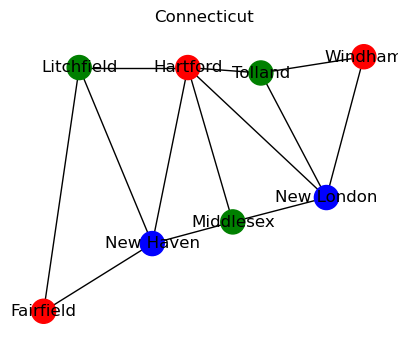

In [12]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [13]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Initializing Graph Nodes for Graph with all specified color options
Nodes:
[0, Fairfield, [1, 2], ['red', 'blue', 'green'], [], None]
[1, Litchfield, [0, 2, 3], ['red', 'blue', 'green'], [], None]
[2, New Haven, [0, 1, 3, 4], ['red', 'blue', 'green'], [], None]
[3, Hartford, [1, 2, 4, 5, 6], ['red', 'blue', 'green'], [], None]
[4, Middlesex, [2, 3, 6], ['red', 'blue', 'green'], [], None]
[5, Tolland, [3, 6, 7], ['red', 'blue', 'green'], [], None]
[6, New London, [3, 4, 5, 7], ['red', 'blue', 'green'], [], None]
[7, Windham, [5, 6], ['red', 'blue', 'green'], [], None]

Sorting nodes by decreasing order of degree for Degree Heuristic
Finding color of node at graph depth 0
Making deepcopy of graph at depth 0
Getting node for current graph depth
Finding least constrained values of node
Trying to find solution with color red for node [3, Hartford, [1, 2, 4, 5, 6], ['red', 'blue', 'green'], [], None] at depth 0
Forward checking by invalidating neighbor's color
Invalidating neighbor 1 color r

## Test Connecticut Solution

In [14]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

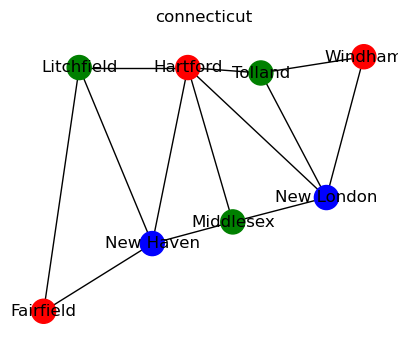

In [15]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [16]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [30]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [31]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

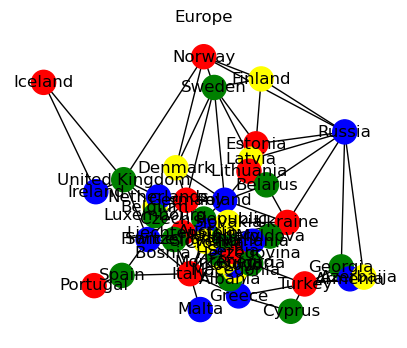

In [32]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [20]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [21]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [22]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 5. OPTIONAL. BONUS. Color Europe with Four Colors. 

Re-do Problem #3 (Color, Test, and Draw Europe with four colors) but instead of picking variables using the Degreee Heuristic, use the Minimum Remaining Values. 

<a id="bonus_color_map"></a>
## bonus_color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. This implementation features: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Minimum Remaining Values Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [23]:
def bonus_color_map(constraint_graph, color_list, trace=False):
    
    graph_object = Graph(constraint_graph, color_list, trace)
    
    ordered_nodes = graph_object.minimum_remaining_values_heuristic(trace)
    
    colored_graph_object = deepcopy(graph_object).bonus_backtrack(deepcopy(ordered_nodes), 0, len(graph_object.get_nodes()), trace)
    
    if not colored_graph_object == None:
        if trace: print("Coloring found :)")
        return [(node.get_name(), node.get_color()) for node in colored_graph_object.get_nodes()]
    
    if trace: print("Coloring not found :(")
    return None

In [27]:
bonus_europe_solution = bonus_color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Bonus Europe Solution

In [28]:
if bonus_europe_solution:
    test_coloring(europe_graph, bonus_europe_solution)

## Draw Bonus Europe Cartoon

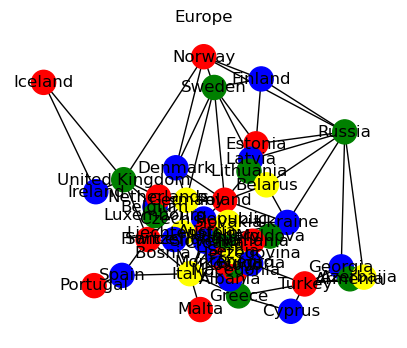

In [29]:
if bonus_europe_solution:
    draw_map("Europe", europe_graph, (5,4), bonus_europe_solution)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".